In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.metrics import confusion_matrix



Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/RedesNeuronales/dateset/datasets/extracted/Diabetes/diabetes1.csv")
d_data = df.rename(columns={'bmi':'BMI','HbA1c_level':'Hemoglobin'})
d_data = d_data.drop('gender', axis=1)
d_data = d_data.drop('smoking_history', axis=1)
#print(df)
d_data.head()


,age,hypertension,heart_disease,BMI,Hemoglobin,blood_glucose_level,diabetes
0,80.0,0,1,25.19,6.6,140,0
1,54.0,0,0,27.32,6.6,80,0
2,28.0,0,0,27.32,5.7,158,0
3,36.0,0,0,23.45,5.0,155,0
4,76.0,1,1,20.14,4.8,155,0


In [ ]:

# Dividir los datos en características (X) y etiquetas (y)
X = d_data.drop("diabetes", axis=1)  # Deja fuera la columna "Diabetes" como características
y = d_data["diabetes"]  # La columna "Diabetes" es nuestra etiqueta de clasificación

# Dividir los datos en conjuntos de entrenamiento y prueba (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear un clasificador k-NN con un valor de k (n_neighbors) específico
k = 4
knn = KNeighborsClassifier(n_neighbors=k)

# Entrenar el clasificador k-NN con los datos de entrenamiento
knn.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred = knn.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

# Mostrar un informe de clasificación con métricas adicionales
print(classification_report(y_test, y_pred))



Precisión del modelo: 0.9549666666666666
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     27453
           1       0.94      0.50      0.66      2547

    accuracy                           0.95     30000
   macro avg       0.95      0.75      0.82     30000
weighted avg       0.95      0.95      0.95     30000



In [ ]:

# Dividir los datos en características (X) y etiquetas (y)
X = d_data.drop("diabetes", axis=1)  # Deja fuera la columna "Diabetes" como características
y = d_data["diabetes"]  # La columna "Diabetes" es nuestra etiqueta de clasificación

# Dividir los datos en conjuntos de entrenamiento y prueba (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear un clasificador de árbol de decisión
decision_tree = DecisionTreeClassifier()

# Entrenar el clasificador de árbol de decisión con los datos de entrenamiento
decision_tree.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred = decision_tree.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

# Mostrar un informe de clasificación con métricas adicionales
print(classification_report(y_test, y_pred))


Precisión del modelo: 0.9541666666666667
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     27453
           1       0.73      0.73      0.73      2547

    accuracy                           0.95     30000
   macro avg       0.85      0.85      0.85     30000
weighted avg       0.95      0.95      0.95     30000



In [ ]:

# Dividir los datos en características (X) y etiquetas (y)
X = d_data.drop("diabetes", axis=1)  # Deja fuera la columna "Diabetes" como características
y = d_data["diabetes"]  # La columna "Diabetes" es nuestra etiqueta de clasificación

# Dividir los datos en conjuntos de entrenamiento y prueba (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear un clasificador de Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el clasificador de Random Forest con los datos de entrenamiento
random_forest.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred = random_forest.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

# Mostrar un informe de clasificación con métricas adicionales
print(classification_report(y_test, y_pred))


Precisión del modelo: 0.9679666666666666
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     27453
           1       0.91      0.69      0.78      2547

    accuracy                           0.97     30000
   macro avg       0.94      0.84      0.88     30000
weighted avg       0.97      0.97      0.97     30000



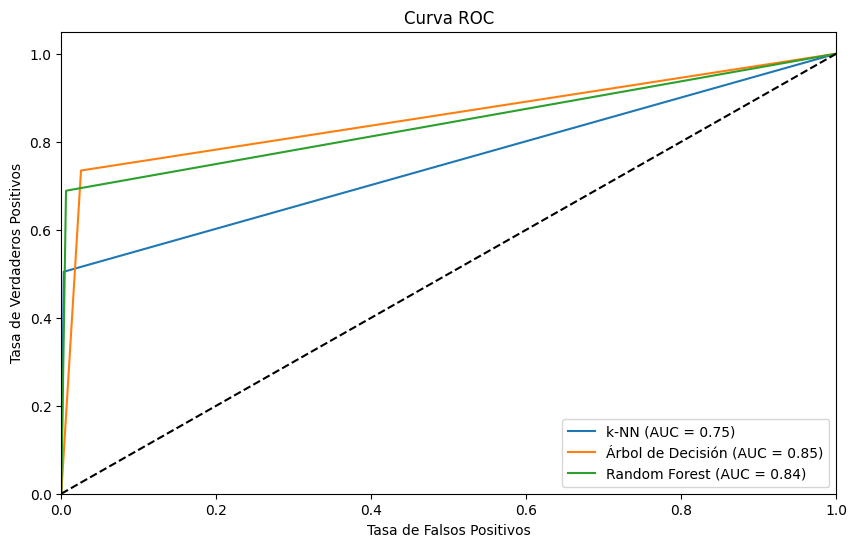

Matriz de confusión k-NN:
[[27364    89]
 [ 1262  1285]]
Matriz de confusión Árbol de Decisión:
[[26754   699]
 [  676  1871]]
Matriz de confusión Random Forest:
[[27285   168]
 [  793  1754]]


In [ ]:

# Realizar predicciones
y_pred_knn = knn.predict(X_test)
y_pred_tree = decision_tree.predict(X_test)
y_pred_rf = random_forest.predict(X_test)

# Calcular la matriz de confusión para cada modelo
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_tree = confusion_matrix(y_test, y_pred_tree)
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Calcular las tasas de falsos positivos y falsos negativos para cada modelo
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_knn)
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_pred_tree)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_knn)
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_pred_tree)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

# Calcular el área bajo la curva ROC (AUC) para cada modelo
auc_knn = auc(fpr_knn, tpr_knn)
auc_tree = auc(fpr_tree, tpr_tree)
auc_rf = auc(fpr_rf, tpr_rf)

# Graficar las curvas ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr_knn, tpr_knn, label='k-NN (AUC = {:.2f})'.format(auc_knn))
plt.plot(fpr_tree, tpr_tree, label='Árbol de Decisión (AUC = {:.2f})'.format(auc_tree))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = {:.2f})'.format(auc_rf))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

# Mostrar las matrices de confusión
print("Matriz de confusión k-NN:")
print(cm_knn)
print("Matriz de confusión Árbol de Decisión:")
print(cm_tree)
print("Matriz de confusión Random Forest:")
print(cm_rf)


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


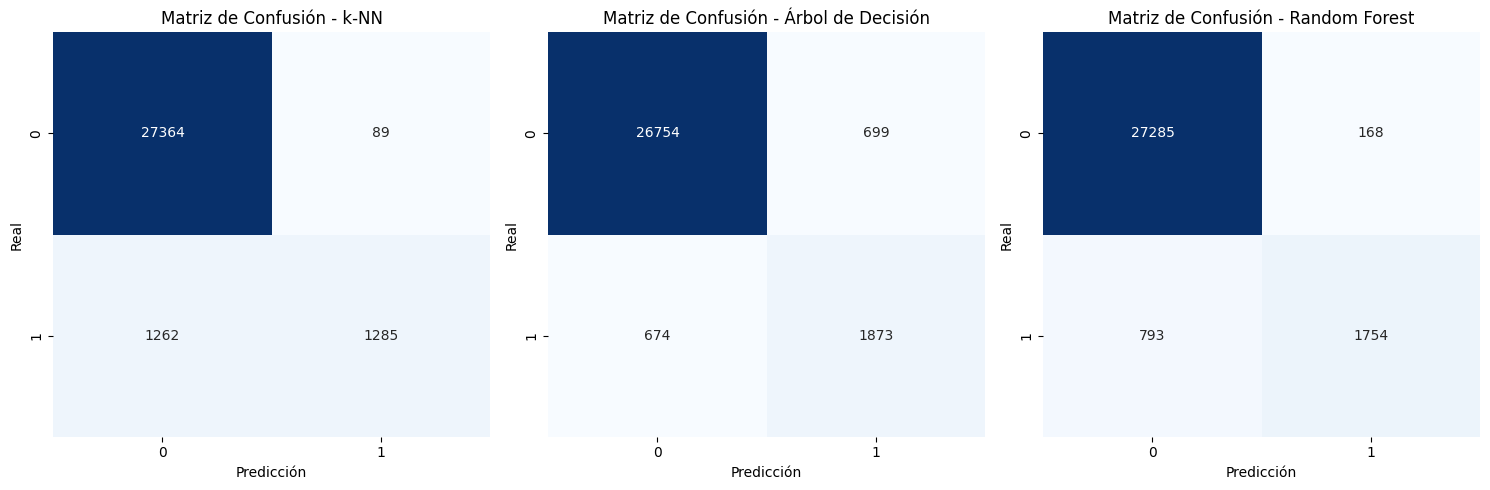

In [ ]:

# Calcular las matrices de confusión
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_tree = confusion_matrix(y_test, y_pred_tree)
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Trazar las matrices de confusión
plt.figure(figsize=(15, 5))

plt.subplot(131)
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Matriz de Confusión - k-NN')
plt.xlabel('Predicción')
plt.ylabel('Real')

plt.subplot(132)
sns.heatmap(cm_tree, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Matriz de Confusión - Árbol de Decisión')
plt.xlabel('Predicción')
plt.ylabel('Real')

plt.subplot(133)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Matriz de Confusión - Random Forest')
plt.xlabel('Predicción')
plt.ylabel('Real')

plt.tight_layout()
plt.show()
